In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf 
import tensorflow.keras as kr 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout 

pd.set_option("chained_assignment", None)

In [33]:
data = pd.read_csv(r"adult.csv")
data.head(3)

,age,sector,education,education_num,marrital_status,occupation,relationship,race,gender,capital_gain,capital_loss,work_hrs,nation,sallary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   sector           32561 non-null  object
 2   education        32561 non-null  object
 3   education_num    32561 non-null  int64 
 4   marrital_status  32561 non-null  object
 5   occupation       32561 non-null  object
 6   relationship     32561 non-null  object
 7   race             32561 non-null  object
 8   gender           32561 non-null  object
 9   capital_gain     32561 non-null  int64 
 10  capital_loss     32561 non-null  int64 
 11  work_hrs         32561 non-null  int64 
 12  nation           32561 non-null  object
 13  sallary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


#### Examine Sector

In [35]:
sector = data[['sector']]
sector.value_counts()

sector           
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [36]:
sectors = pd.get_dummies(sector, prefix="sector", prefix_sep="_")
sectors.head()

,sector_ ?,sector_ Federal-gov,sector_ Local-gov,sector_ Never-worked,sector_ Private,sector_ Self-emp-inc,sector_ Self-emp-not-inc,sector_ State-gov,sector_ Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


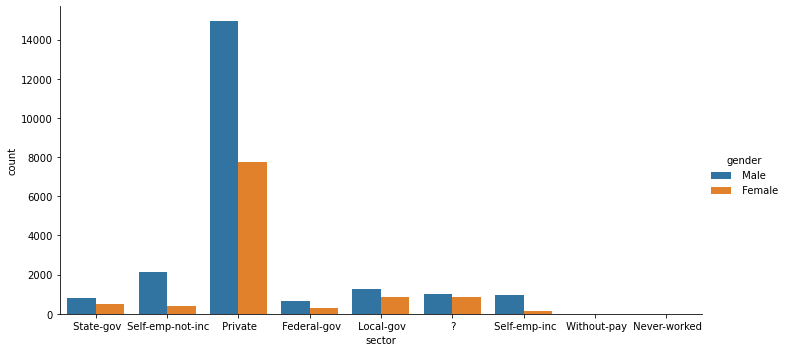

In [37]:
# Group secort by gender
sns.catplot(kind='count', data=data, x='sector', hue='gender', aspect=2)

In [38]:
data.drop(columns=['sector'], inplace=True)
data = pd.concat([data, sectors], axis=1)

In [39]:
def add_one_hot(df, col, other):
    '''Concate a set of one hot encoded variables to a df and drop the col they were generated from'''
    df.drop(columns=[col], inplace=True)
    new_df = pd.concat([df, other], axis=1)

    return new_df

In [40]:
data.columns.values[:4]

array(['age', 'education', 'education_num', 'marrital_status'],
      dtype=object)

### Examine Education

In [41]:
edu = data[['education']]
edu.value_counts()

education    
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
dtype: int64

In [42]:
# This data is ordinal, so it's ok to just use the numbered education column
data.drop(columns=['education'], inplace=True)

### Examine Marital Status

In [43]:
status = data[['marrital_status']]
status.value_counts()

marrital_status       
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [44]:
statuses = pd.get_dummies(data[['marrital_status']])
statuses.head(2)

,marrital_status_ Divorced,marrital_status_ Married-AF-spouse,marrital_status_ Married-civ-spouse,marrital_status_ Married-spouse-absent,marrital_status_ Never-married,marrital_status_ Separated,marrital_status_ Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0


In [45]:
data = add_one_hot(data, 'marrital_status', statuses)
data.head(3)

,age,education_num,occupation,relationship,race,gender,capital_gain,capital_loss,work_hrs,nation,...,sector_ Self-emp-not-inc,sector_ State-gov,sector_ Without-pay,marrital_status_ Divorced,marrital_status_ Married-AF-spouse,marrital_status_ Married-civ-spouse,marrital_status_ Married-spouse-absent,marrital_status_ Never-married,marrital_status_ Separated,marrital_status_ Widowed
0,39,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,...,0,1,0,0,0,0,0,1,0,0
1,50,13,Exec-managerial,Husband,White,Male,0,0,13,United-States,...,1,0,0,0,0,1,0,0,0,0
2,38,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,...,0,0,0,1,0,0,0,0,0,0


### Examine Occupation

In [46]:
occ = data[['occupation']]
occ.loc[occ.occupation==" ?", 'occupation'] = "other"
occ['occupation'] = occ.occupation.str.replace(" ", "")
occ.value_counts()

occupation       
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
other                1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64

In [47]:
occ = pd.get_dummies(occ['occupation'])
occ.head()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


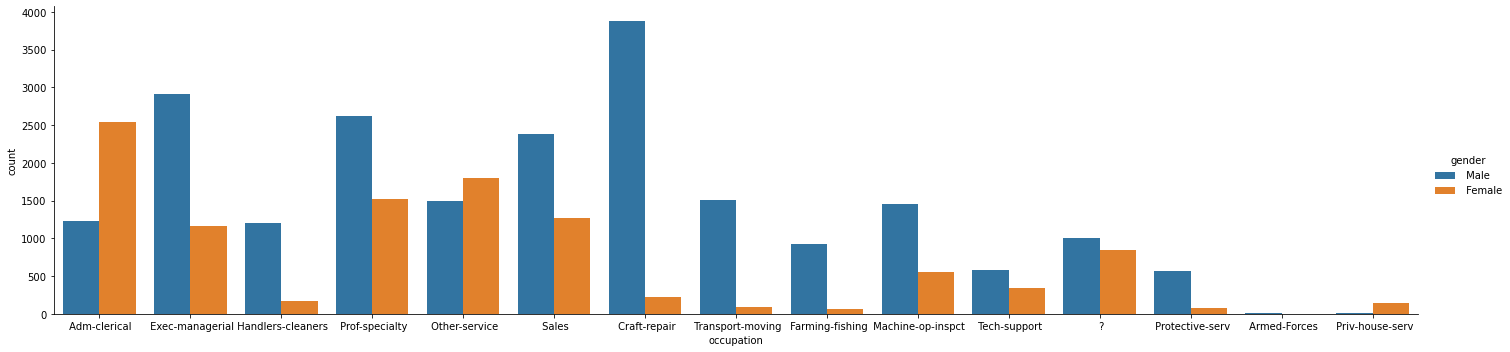

In [48]:
sns.catplot(kind='count', data=data, x='occupation', hue='gender', aspect=4)

In [49]:
data = add_one_hot(data, "occupation", occ)
data.head()

,age,education_num,relationship,race,gender,capital_gain,capital_loss,work_hrs,nation,sallary,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,other
0,39,13,Not-in-family,White,Male,2174,0,40,United-States,<=50K,...,0,0,0,0,0,0,0,0,0,0
1,50,13,Husband,White,Male,0,0,13,United-States,<=50K,...,0,0,0,0,0,0,0,0,0,0
2,38,9,Not-in-family,White,Male,0,0,40,United-States,<=50K,...,1,0,0,0,0,0,0,0,0,0
3,53,7,Husband,Black,Male,0,0,40,United-States,<=50K,...,1,0,0,0,0,0,0,0,0,0
4,28,13,Wife,Black,Female,0,0,40,Cuba,<=50K,...,0,0,0,0,1,0,0,0,0,0


### Examine Relationship

In [50]:
rel = data[['relationship']]
rel['relationship'] = rel['relationship'].str.replace(" ", "")
rel.value_counts()

relationship  
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
dtype: int64

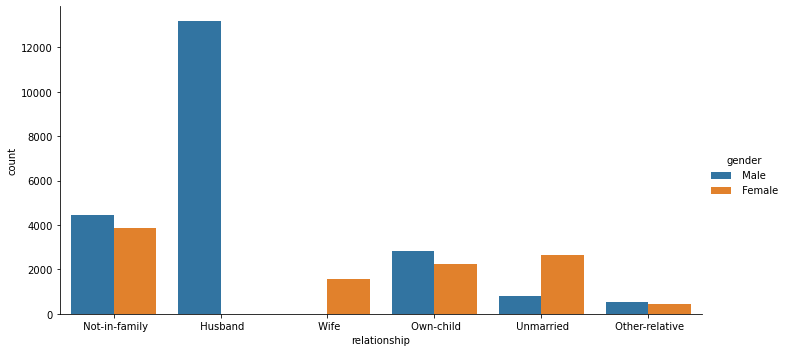

In [51]:
sns.catplot(kind='count', data=data, x='relationship', hue='gender', aspect=2)

In [52]:
rel = pd.get_dummies(rel.relationship)
data = add_one_hot(data, 'relationship', rel)
data.head()

,age,education_num,race,gender,capital_gain,capital_loss,work_hrs,nation,sallary,sector_ ?,...,Sales,Tech-support,Transport-moving,other,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,13,White,Male,2174,0,40,United-States,<=50K,0,...,0,0,0,0,0,1,0,0,0,0
1,50,13,White,Male,0,0,13,United-States,<=50K,0,...,0,0,0,0,1,0,0,0,0,0
2,38,9,White,Male,0,0,40,United-States,<=50K,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,Black,Male,0,0,40,United-States,<=50K,0,...,0,0,0,0,1,0,0,0,0,0
4,28,13,Black,Female,0,0,40,Cuba,<=50K,0,...,0,0,0,0,0,0,0,0,0,1


### Examine Race and Gender

In [53]:
rc = data[['race']]
gd = data[['gender']]
rc.value_counts(), gd.value_counts()

(race               
  White                 27816
  Black                  3124
  Asian-Pac-Islander     1039
  Amer-Indian-Eskimo      311
  Other                   271
 dtype: int64,
 gender 
  Male      21790
  Female    10771
 dtype: int64)

In [54]:
data.sallary = data.sallary.str.lstrip(" ")
data['temp'] = 0
data.loc[data.sallary==">50K", 'temp'] = 1
data['sallary'] = data['temp']
data.drop(columns=['temp'], inplace=True)
data.sallary.value_counts()

0    24720
1     7841
Name: sallary, dtype: int64

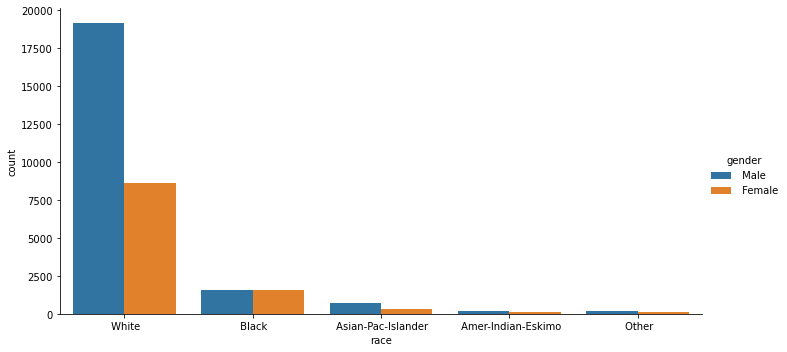

In [55]:
sns.catplot(kind='count', data=data, x='race', hue='gender', aspect=2)

In [56]:
data.gender = data.gender.str.lstrip()
data.race = data.race.str.lstrip()

[Text(0.5, 0, 'Female Sallary')]

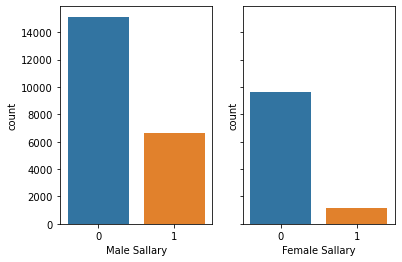

In [57]:
fig, ax = plt.subplots(1, 2, sharey=True)
sns.countplot(data=data.loc[data.gender=='Male'], x='sallary', ax=ax[0])
sns.countplot(data=data.loc[data.gender=='Female'], x='sallary', ax=ax[1])
ax[0].set(xlabel='Male Sallary')
ax[1].set(xlabel='Female Sallary')

In [58]:
gd = pd.get_dummies(gd)
rc = pd.get_dummies(rc)
data = add_one_hot(data, 'gender', gd)
data = add_one_hot(data, 'race', rc)
data.head(2)

,age,education_num,capital_gain,capital_loss,work_hrs,nation,sallary,sector_ ?,sector_ Federal-gov,sector_ Local-gov,...,Own-child,Unmarried,Wife,gender_ Female,gender_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,13,2174,0,40,United-States,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,50,13,0,0,13,United-States,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [59]:
na = pd.get_dummies(data[['nation']])
data = add_one_hot(data, 'nation', na)
data.head()

,age,education_num,capital_gain,capital_loss,work_hrs,sallary,sector_ ?,sector_ Federal-gov,sector_ Local-gov,sector_ Never-worked,...,nation_ Portugal,nation_ Puerto-Rico,nation_ Scotland,nation_ South,nation_ Taiwan,nation_ Thailand,nation_ Trinadad&Tobago,nation_ United-States,nation_ Vietnam,nation_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Scale model (necissary for relu activation function)
#scaler = MinMaxScaler()
#scaler.fit(data)
#scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns)

#scaled_data.head()

# THERE IS A MISTAKE HERE!!!! THE TRAING DATA SHOULD BE USED TO FIT THE SCALER AND THEN THE SCALER SHOULD BE 
# APPLIED TO THE TEST SET

### Start Modeling

In [62]:
tf_data = data.drop(columns=["sallary"])
tf_y = data.sallary
tf_X = tf_data.astype('float32')


tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, tf_y, test_size=0.3, random_state=42)
tf_y_train, tf_y_test = tf_y_train.to_frame(), tf_y_test.to_frame()
tf_X_train.shape, tf_X_test.shape, tf_y_train.shape, tf_y_test.shape 

((22792, 91), (9769, 91), (22792, 1), (9769, 1))

In [63]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaler.fit(tf_X_train)
y_scaler.fit(tf_y_train)

tf_X_train = X_scaler.transform(tf_X_train)
tf_X_test = X_scaler.transform(tf_X_test)
tf_y_train = y_scaler.transform(tf_y_train)
tf_y_test = y_scaler.transform(tf_y_test)

In [64]:
tf.random.set_seed(42)
model = kr.Sequential()

model.add(kr.layers.Dense(32, input_shape=(91, ), activation="relu"))
#model.add(kr.layers.Dropout(0.05))
model.add(kr.layers.Dense(8, activation='relu'))
#model.add(kr.layers.Dropout(0.05))
model.add(kr.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=kr.optimizers.Adam(learning_rate=0.00001), loss=kr.losses.BinaryCrossentropy(), metrics=["accuracy", 'AUC'])

model.fit(tf_X_train, tf_y_train, epochs=400, validation_split=0.1)

Epoch 1/400
641/641 [==============================] - 4s 4ms/step - loss: 0.6101 - accuracy: 0.7381 - auc: 0.5856 - val_loss: 0.5887 - val_accuracy: 0.7561 - val_auc: 0.6184
Epoch 2/400
641/641 [==============================] - 2s 3ms/step - loss: 0.5725 - accuracy: 0.7551 - auc: 0.6537 - val_loss: 0.5558 - val_accuracy: 0.7610 - val_auc: 0.6744
Epoch 3/400
641/641 [==============================] - 2s 3ms/step - loss: 0.5450 - accuracy: 0.7567 - auc: 0.6981 - val_loss: 0.5313 - val_accuracy: 0.7614 - val_auc: 0.7104
Epoch 4/400
641/641 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.7568 - auc: 0.7302 - val_loss: 0.5123 - val_accuracy: 0.7618 - val_auc: 0.7379
Epoch 5/400
641/641 [==============================] - 2s 3ms/step - loss: 0.5076 - accuracy: 0.7570 - auc: 0.7519 - val_loss: 0.4969 - val_accuracy: 0.7618 - val_auc: 0.7588
Epoch 6/400
641/641 [==============================] - 2s 3ms/step - loss: 0.4939 - accuracy: 0.7569 - auc: 0.7695 - val_loss

In [65]:
history = model.history.history
history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

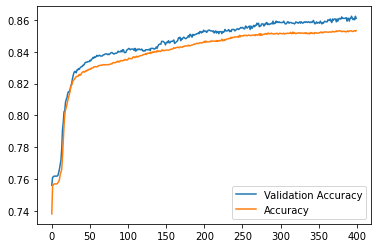

In [66]:
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.plot(history['accuracy'], label='Accuracy')
plt.legend()

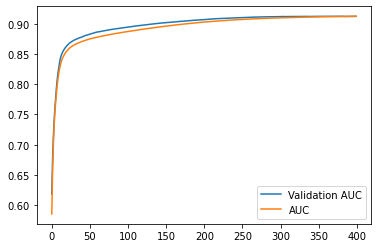

In [67]:
plt.plot(history['val_auc'], label="Validation AUC")
plt.plot(history['auc'], label="AUC")
plt.legend()

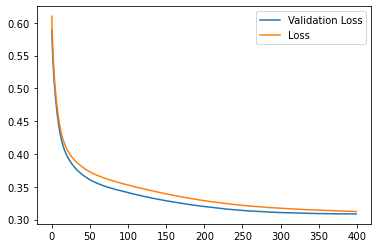

In [68]:
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['loss'], label='Loss')
plt.legend()

In [69]:
pred = model.predict(tf_X_test)
pred[:10]

306/306 [==============================] - 1s 2ms/step


array([[0.01755489],
       [0.55573976],
       [0.7540391 ],
       [0.01879549],
       [0.14541334],
       [0.805681  ],
       [0.92260915],
       [0.00275264],
       [0.10125895],
       [0.5003657 ]], dtype=float32)

In [70]:
tf_y_test[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [75]:
tf_y_test.sum() / tf_y_test.shape[0]

0.2368717371276487

In [72]:
pred.shape 

(9769, 1)

In [73]:
pdf = [round(i) for i in pred.flatten()]
pdf = pd.DataFrame(pdf)
pdf.describe()

,0
count,9769.000000
mean,0.199202
std,0.399420
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("Test AUC:", roc_auc_score(tf_y_test, pred))
print("Test Accuracy:", accuracy_score(tf_y_test, pdf))
print("Test Precision", precision_score(tf_y_test, pdf))
print("Test Recall:", recall_score(tf_y_test, pdf))
print("Test F1 score:", f1_score(tf_y_test, pdf))

Test AUC: 0.9047164867626966
Test Accuracy: 0.8548469648889344
Test Precision 0.7302158273381295
Test Recall: 0.6140881590319792
Test F1 score: 0.6671361502347418


In [77]:
cmatx = confusion_matrix(tf_y_test, pdf)
cmatx 

array([[6930,  525],
       [ 893, 1421]], dtype=int64)

In [78]:
pdf.value_counts()

0    7823
1    1946
dtype: int64

In [80]:
data.to_csv("processed_adult.csv")